# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# MOUNTING THE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

In [3]:
# LOADING OUR DATA
df = pd.read_csv('/content/drive/MyDrive/Capston Project/Online Retail Customer Segmentation/Online Retail (1).csv', encoding = "ISO-8859-1")

### Glimpses of our data

In [4]:
# first five rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
# last five rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [6]:
# random five rows
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
398734,571257,21935,SUKI SHOULDER BAG,7,14-10-2011 17:17,1.63,NaN,United Kingdom
119519,546549,22776,SWEETHEART CAKESTAND 3 TIER,1,14-03-2011 16:46,9.95,17799.0,United Kingdom
191395,553356,22384,LUNCH BAG PINK POLKADOT,10,16-05-2011 14:05,1.65,14038.0,United Kingdom
148185,549188,21715,GIRLS VINTAGE TIN SEASIDE BUCKET,8,07-04-2011 10:10,2.55,13731.0,United Kingdom
524578,580602,23269,SET OF 2 CERAMIC CHRISTMAS TREES,12,05-12-2011 11:29,1.45,16149.0,United Kingdom


# Data Information

In [7]:
df.shape

(541909, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Observation:**
1. There are 8 columns with 5,41,909 rows of data.
2. There are 4 categorical columns, 3 numerical columns and 1 date type columns. 

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning

In [10]:
# checking for duplicate values
df.duplicated().sum()

5268

In [11]:
# dropping the duplicates
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(536641, 8)

**Observations:**
1. There are 5,268 duplicate rows.
2. Shape of data before dropping the duplicates ---> (541909, 8)
3. Shape of data after dropping the duplicates ---> (536641, 8)

In [13]:
# NUMBER OF UNIQUE VALUES IN EAH COLUMN
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [14]:
# CHECKING FOR NULL VALUES
pd.DataFrame({'Columns' : df.columns,
              'Toatl Nos of Null values' : df.isna().sum(),
              '% of null values' : round(df.isna().mean() * 100,2)}).reset_index().drop(['index'], axis = 1)

,Columns,Toatl Nos of Null values,% of null values
0,InvoiceNo,0,0.00
1,StockCode,0,0.00
2,Description,1454,0.27
3,Quantity,0,0.00
4,InvoiceDate,0,0.00
5,UnitPrice,0,0.00
6,CustomerID,135037,25.16
7,Country,0,0.00


**Observations:**
1. There are 1454 null values (0.27%) in `Description` columns.
2. There are 135037 null values (25.16%) in `CustomerID` columns.

In [15]:
# Check if InvoiceNo for Null Customer ID exist in cases where Customer ID is present for filling CustomerID Nulls
df[df['CustomerID'] == 'NaN']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**Observation:**
* No such cases present as empty dataframe is returned.

In [16]:
# CREATING A LIST OF UNIQUE INVOICES WHERE CUSTOMER ID IS NULL
null_id_invoices = df[df.CustomerID.isna()]['InvoiceNo'].drop_duplicates().tolist()
print('Invoices count with null Customer ID:  ', len(null_id_invoices))

Invoices count with null Customer ID:   3710


In [17]:
# CHECK IF INVOICE NUMBER IN NULL CUSTOMER ID DF EXIST IN NON - NULL CUSTOMER ID DF
df[~df['CustomerID'].isna()][df['InvoiceNo'].isin(null_id_invoices)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Since the customer ID's are missing, I assume these orders were not made by the customers already in the data set because those customers already have ID's. I also don't want to assign these orders to those customers because this would alter the insights I draw from the data. Instead of dropping the null CustomerID values which amounts to ~25% of data, let's assign those rows a unique customer ID per order using InvoiceNo. This will act as a new customer for each unique order.

In [18]:
# CHECK IF INVOICE NUMBER HAS UNIQUE MAPPING WITH CUSTOMER ID SO THAT
# EACH INVOICE NUMBER CORRESPONDING TO NULL CUSTOMER ID CAN BE ASSIGN A NEW CUSTOMER.
df.groupby(['InvoiceNo'])['CustomerID'] \
                             .nunique() \
                             .reset_index(name='nunique') \
                             .sort_values(['nunique'], ascending=False) \
                             .head(10)

,InvoiceNo,nunique
0,536365,1
16915,571200,1
16924,571215,1
16923,571214,1
16922,571213,1
16921,571212,1
16920,571205,1
16919,571204,1
16918,571203,1
16917,571202,1


**Observation:**
* On sorting, this data shows that each invoice related to maximum 1 customer.

In [19]:
# CREATING NewId COLUMN AND ASSIGNING TO InvoiceNo WHERE CustomerID IS NULL
df['NewID'] = df['CustomerID']
df.loc[df['CustomerID'].isnull(), ['NewID']] = df['InvoiceNo']

# REMOVE ALL NON DIGIT CHARATERS FROM NewID COLUMNS
# SINCE INVOICE CAN CONTAIN 'C' REFERRING TO CANCELLATIONS
df['NewID'] = df['NewID'].astype(str).str.replace('\D+', '')

# CONVERT TO INTEGER
df['NewID'] = pd.to_numeric(df['NewID'])

# CHECK IF PRESENT CustomerIDs AND NewIDs HAVE ANY COMMON VALUES SINCE IT WOULD CREATE ALTER ACTUAL CUSTOMER INSIGHTS
customer = df['CustomerID'].nunique()
null_invoices = df[df.CustomerID.isnull()]['InvoiceNo'].nunique()
new_ids = df['NewID'].nunique()
print("Number of Customers:", customer)
print("Number of Orders where CustomerID in Null:", null_invoices)
print("Number of Customers + Number of Orders where CustomerID in Null:", customer + null_invoices)
print("Number of New ID's:", new_ids)

Number of Customers: 4372
Number of Orders where CustomerID in Null: 3710
Number of Customers + Number of Orders where CustomerID in Null: 8082
Number of New ID's: 8082


* Since both values equal, we know all the different orders that didn't have a customer ID got assigned unique NewID and no duplicates were created.

In [20]:
# RANGE OF InvoiceDate COLUMN
print('Maximum Invoice Date: ', max(df['InvoiceDate']))
print('Minimum Invoice Date: ', min(df['InvoiceDate']))

Maximum Invoice Date:  31-10-2011 17:19
Minimum Invoice Date:  01-02-2011 08:23


In [21]:
# ADDING CANCELLATIONS COLUMN BASED ON DEFINITION THAT InvoiceNo START WITH 'C'
df["cancellations"] = np.where(df["InvoiceNo"].str.startswith('C'), 1, 0)
total_data = df["InvoiceNo"].shape[0]
cancelled_data = df[df.cancellations == 1].shape[0]
print("Number of cancelled products data", cancelled_data, cancelled_data*100/total_data, "\n")

print(df[df.cancellations == 1]["Quantity"].describe())

# REMOVING CANCELLATIONS SINCE THEY HAVE NEGATIVE QUANTITIES AND MAKE ONLY ~2% OF DATA
df = df[df.cancellations == 0]

Number of cancelled products data 9251 1.7238712658928408 

count     9251.000000
mean       -29.787050
std       1147.997592
min     -80995.000000
25%         -6.000000
50%         -2.000000
75%         -1.000000
max         -1.000000
Name: Quantity, dtype: float64


# EDA

### Analysis of Unit Price Variable

In [22]:
# MAXIMUM AND MINIMUM UNIT PRICE
print("Minimum UnitPrice", min(df["UnitPrice"]))
print("Maximum UnitPrice", max(df["UnitPrice"]))
print('=== ' * 30 + '\n')

# DESCRIPTION OF UNIT PRICE COLUMN
df["UnitPrice"].describe()

Minimum UnitPrice -11062.06
Maximum UnitPrice 13541.33
=== === === === === === === === === === === === === === === === === === === === === === === === === === === === === === 



count    527390.000000
mean          3.861939
std          41.963759
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [23]:
# ROWS WHERE UNIT PRICE IS LESS THAN ZERO OR NEGATIVE
df[df.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,NewID,cancellations
299983,A563186,B,Adjust bad debt,1,12-08-2011 14:51,-11062.06,NaN,United Kingdom,563186,0
299984,A563187,B,Adjust bad debt,1,12-08-2011 14:52,-11062.06,NaN,United Kingdom,563187,0


In [24]:
# REMOVING THESE ROWS --- THEY ARE TOTAL 2 ROWS. SO IT WILL NOT IMPACT OUR DATA
df = df[df['UnitPrice'] >= 0]

In [25]:
df.shape

(527388, 10)

* Afetr removing the rows, the shape of our data becomws (527388, 10)

In [26]:
# % OF DATA WITH UNIT PRICE = 0
print("% of data with Price = 0: ", round(len(df[df.UnitPrice == 0]) * 100 / len(df),2),"%" )

# NUMBER OF UNIQUE CUSTOMER WITH UNIT PRICE = 0
print("Count of unique Customer ID where Unit Price = 0: ", df[df.UnitPrice == 0].CustomerID.nunique(), "\n")

# GETTING THE DATA WHERE UNIT PRICE IS ZERO BUT CUSTOMER ID IS NOT NULL
print('=== ' * 25)
df[df.UnitPrice == 0][~df.CustomerID.isnull()].head()

% of data with Price = 0:  0.48 %
Count of unique Customer ID where Unit Price = 0:  31 

=== === === === === === === === === === === === === === === === === === === === === === === === === 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,NewID,cancellations
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,05-12-2010 14:02,0.0,12647.0,Germany,126470,0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,16-12-2010 14:36,0.0,16560.0,United Kingdom,165600,0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,21-12-2010 13:45,0.0,14911.0,EIRE,149110,0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,06-01-2011 16:41,0.0,13081.0,United Kingdom,130810,0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,06-01-2011 16:41,0.0,13081.0,United Kingdom,130810,0


In [27]:
# DROPPING ROWS WITH UNIT PRICE = 0
df = df[df.UnitPrice > 0]
df["UnitPrice"].describe()

count    524878.000000
mean          3.922573
std          36.093028
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [28]:
# MAXIMUM AND MUNIMUM QUANTITIES
print("Minimum Quantity", min(df["Quantity"]))
print("Maximum Quantity", max(df["Quantity"]))
print('=== ' * 25 + '\n')

# STATISTICAL VALUES OF QUANTITY COLUMN
df["Quantity"].describe()

Minimum Quantity 1
Maximum Quantity 80995
=== === === === === === === === === === === === === === === === === === === === === === === === === 



count    524878.000000
mean         10.616600
std         156.280031
min           1.000000
25%           1.000000
50%           4.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

### Customer and total revenue split wrto country

In [29]:
# ADDING MONETARY INFORMATION BY CALCULATING TOTAL VALUE OF TRANSACTION
df["Total_sales"] = df["UnitPrice"] * df["Quantity"]

# CREATING COUNTRY LEVEL GROUPING TO FIND UNIQUE CUSTOMER COUND AND %
country_customer_df = df.groupby("Country")["CustomerID"].nunique().reset_index().rename(columns = \
                                                                                           {"CustomerID":"count_CustomerID"})
country_customer_df["customer_%"] = round(country_customer_df["count_CustomerID"] * \
                                          100/country_customer_df["count_CustomerID"].sum(),2)

# CREATING COUNTRY LEVEL GROUPING TO FIND TOTAL REVENUE AND %
country_df = df.groupby("Country")["Total_sales"].sum().reset_index()
country_df["Total_sales%"] = round(country_df["Total_sales"] * 100 / country_df["Total_sales"].sum(),2)

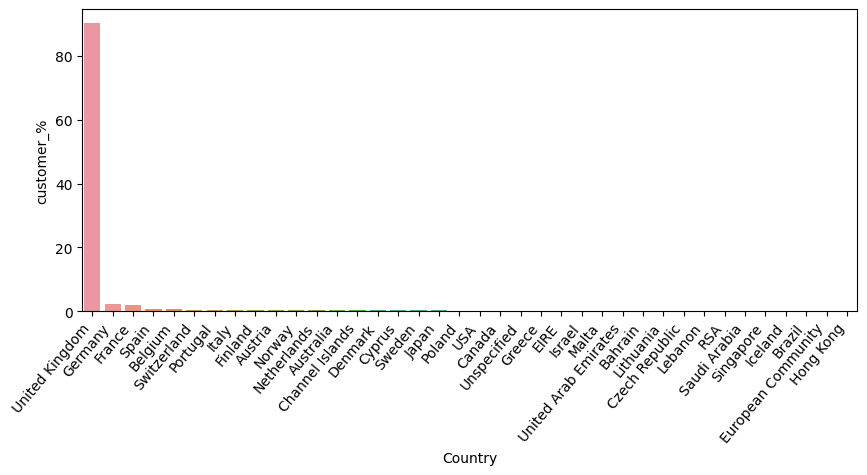

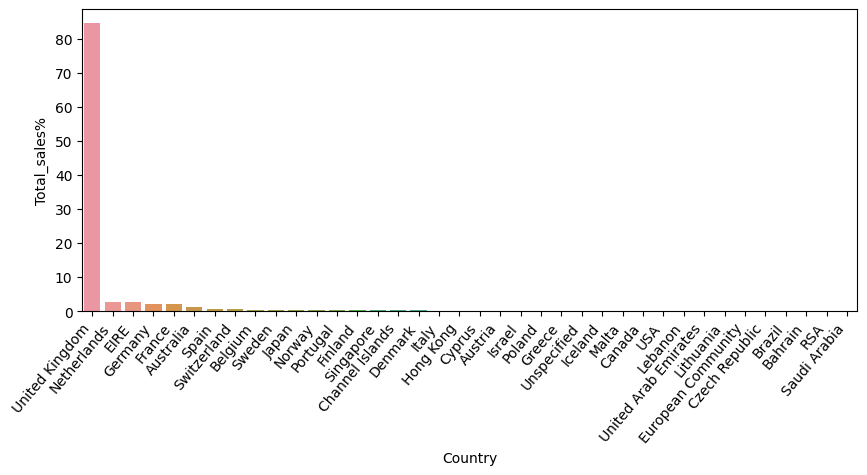

In [32]:
# COUNTRY V/S CUSTOMER %
country_customer_df = country_customer_df.sort_values(by = "customer_%", ascending = False)
fig, ax = plt.subplots(figsize = (10, 4), dpi = 100)
ax = sns.barplot(x = country_customer_df["Country"], y = country_customer_df['customer_%'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50, ha = "right")
plt.show()

# COUNTRY V/S TOTAL SALES %
country_df = country_df.sort_values(by = "Total_sales%", ascending = False)
fig, ax = plt.subplots(figsize = (10, 4), dpi = 100)
ax = sns.barplot(x = country_df["Country"], y = country_df['Total_sales%'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50, ha = "right")
plt.show()

* The United Kingdom not only has the most sales revenue, but also the most customers. Therefore, for the purpose of this analysis, I will be taking data corresponding to orders from the United Kingdom.

In [34]:
# CREATING A UK DF
uk_df = df[df.Country == "United Kingdom"]
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479985 entries, 0 to 541893
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      479985 non-null  object 
 1   StockCode      479985 non-null  object 
 2   Description    479985 non-null  object 
 3   Quantity       479985 non-null  int64  
 4   InvoiceDate    479985 non-null  object 
 5   UnitPrice      479985 non-null  float64
 6   CustomerID     349203 non-null  float64
 7   Country        479985 non-null  object 
 8   NewID          479985 non-null  int64  
 9   cancellations  479985 non-null  int64  
 10  Total_sales    479985 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 43.9+ MB


In [35]:
# CHECKING MOST POPULAR PRODUCT IN UK
uk_product = uk_df.groupby(['StockCode', 'Description'], as_index= False)['Quantity'].sum().sort_values(by = 'Quantity', ascending = False)
uk_product.head(5)

,StockCode,Description,Quantity
2653,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2112,23166,MEDIUM CERAMIC TOP STORAGE JAR,77036
3113,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49430
3601,85099B,JUMBO BAG RED RETROSPOT,44161
3622,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35430


In [36]:
# FIND THE UNIQUE NUMBER OF InvoiceNo PER CUSTOMER FOR ANALYZING UK 
groupby_customers = pd.DataFrame(uk_df.groupby('NewID')['InvoiceNo'].nunique())
groupby_customers.describe()

,InvoiceNo
count,5293.000000
mean,3.404308
std,6.356634
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,209.000000


In [37]:
# FIND THE UNIQUE MBER OF PRODUCTS PER ORDER
groupby_invoice = pd.DataFrame(uk_df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns = ['Number of products per Order']
groupby_invoice.describe()

,Number of products per Order
count,18019.000000
mean,26.351129
std,48.882851
min,1.000000
25%,6.000000
50%,15.000000
75%,29.000000
max,1110.000000


* The average number of orders per customer is 1 and average number of products per Order is 15

# RFM Analysis

RFM is a data modeling method used to analyze customer value. It stands for Recency, Frequency and Monetary, which are just three metrics that describe what your customers did.

* *Recency (R) of a customer* - Days since the last purchase.
* *Frequency (F) of the bookings/turnover of a customer* - Number of purchases, e.g., in 6 months.
* *Monetary (M)* - The total turnover of a customer: Sum of sales, e.g., in 6 months.

For the analysis, we need to define a ‘analysis date’, which is the day on which we are conducting this analysis which I am taking as the next to last date in data and taking 1 year previous data from the selected date for recency calculation

In [40]:
# CONVERTING THE InvoiceDate COLUMN INTO DATETIME
uk_df['InvoiceDate'] = pd.to_datetime(uk_df['InvoiceDate'])

In [41]:
# CREATING AN RFM ANALYSIS DF
analysis_date = uk_df["InvoiceDate"].max() + pd.DateOffset(1)
print("RFM Analysis Date :", analysis_date)

# START DATE FOR OUR ANALYSIS DF
start_date = analysis_date - pd.DateOffset(days = 365)
print("Start Date when taking 1 year data for analysis :", start_date)

RFM Analysis Date : 2011-12-11 17:19:00
Start Date when taking 1 year data for analysis : 2010-12-11 17:19:00


In [39]:
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479985 entries, 0 to 541893
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      479985 non-null  object 
 1   StockCode      479985 non-null  object 
 2   Description    479985 non-null  object 
 3   Quantity       479985 non-null  int64  
 4   InvoiceDate    479985 non-null  object 
 5   UnitPrice      479985 non-null  float64
 6   CustomerID     349203 non-null  float64
 7   Country        479985 non-null  object 
 8   NewID          479985 non-null  int64  
 9   cancellations  479985 non-null  int64  
 10  Total_sales    479985 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 43.9+ MB
